# Rendőrségi rajz
A  környéken megnőtt a betörések száma, de az elkövető nem hagyott maga után semmilyen bizonyítékot, ujjlenyomatot ami alapján meg lehetne találni.

Tegnap azonban jelentkezett egy szemtanú, akinek az elmondása alapján kollegád rendőrségi rajzot készített. Keresd meg, hogy a környéken lakó bűnözők közül kire hasonlít leginkább a rajz! (face_recognition.api.face_distance())

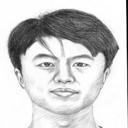


A válasz a bűnöző neve, azaz a fájlnév (kiterjesztés nélkül)


Fájlok: a rendőrségi rajz (police_sketch.jpg), fotók a környéken lakó bűnözőkről, egy betanított tf keras háló (sketch_to_photo.h5), ami rendőrségi rajzból fotót generál (sketch.zip)

A face_recognition csomag installálásához szükség van GPUra (colab Change runtime type to GPU)!


In [1]:
!pip install face_recognition



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=282dbbed0fc6a34b1bfda2d71bf24130d95ef40c175e25beb18dfa1e28b98068
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import face_recognition




In [3]:

!gdown 1SO-LODA4pQPiaxKVFKkkpqYkzRxxDm6Q
!unzip sketch.zip

Downloading...
From: https://drive.google.com/uc?id=1SO-LODA4pQPiaxKVFKkkpqYkzRxxDm6Q
To: /content/sketch.zip
100% 15.9M/15.9M [00:00<00:00, 188MB/s]
Archive:  sketch.zip
   creating: criminals_nearby/
  inflating: criminals_nearby/Rachel_Pena.jpg  
  inflating: criminals_nearby/Dale_Carter.jpg  
  inflating: criminals_nearby/Girolamo_Sbarbaro.jpg  
  inflating: criminals_nearby/Kelly_Bates.jpg  
  inflating: criminals_nearby/Charles_Kelly.jpg  
  inflating: criminals_nearby/Erica_Nielsen_MD.jpg  
  inflating: criminals_nearby/Lara_Gentileschi.jpg  
  inflating: criminals_nearby/Mario_Marino-Cociarelli.jpg  
  inflating: criminals_nearby/Donatella_Sauli-Druso.jpg  
  inflating: criminals_nearby/Mark_Johnson.jpg  
  inflating: criminals_nearby/Carrie_Quinn.jpg  
  inflating: criminals_nearby/Brianna_Conner.jpg  
  inflating: criminals_nearby/Willie_Hill.jpg  
  inflating: criminals_nearby/Teresa_Bevilacqua.jpg  
  inflating: criminals_nearby/Berenice_Esposito.jpg  
  inflating: criminal

In [4]:
from tensorflow import keras
model = keras.models.load_model('sketch_to_photo.h5')

In [6]:
import os
input_folder = 'criminals_nearby'
output_folder = 'criminals_nearby_model'
os.makedirs(output_folder, exist_ok=True)

In [33]:
img_path = 'police_sketch.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
predictions = model.predict(x)
scaled_predictions = (predictions[0] - np.min(predictions[0])) / (np.max(predictions[0]) - np.min(predictions[0]) + 1e-7) * 255

# Convert to unsigned 8-bit integer
scaled_predictions = np.uint8(scaled_predictions)

# Save the image
cv2.imwrite('image.jpg', scaled_predictions)

1/1 [==============================] - 0s 29ms/step


True

In [37]:
img_original = image.load_img('image.jpg', target_size=(224, 224))

img_original = np.array(img_original)

face_encoding = face_recognition.face_encodings(img_original)

dist_max = 100000
filename_max = ""

for filename in os.listdir(input_folder):
  if filename.endswith('.jpg'):
    img_path = os.path.join(input_folder, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    img = np.array(img)
    face_encoding_ref = face_recognition.face_encodings(img)
    dist = face_recognition.api.face_distance(face_encoding_ref, face_encoding[0])
    #print(dist)
    if len(dist) > 1:
      dist = dist[0]
    if dist <= dist_max:
      dist_max = dist
      filename_max = filename

print(dist_max)
print(filename)

<ipython-input-37-532b5407e001>:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if dist <= dist_max:


[0.45175003]
Erik_Harris.jpg
